In [1]:
import numpy as np
from scipy import fftpack
from scipy import optimize
from scipy import stats
from scipy import ndimage
from scipy import misc
from scipy import signal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
img = plt.imread("http://members.cbio.mines-paristech.fr/~nvaroquaux/formations/scipy-lecture-notes/_images/moonlanding.png")
ft = fftpack.fft2(img, axes=(0, 1))
ft[50:450] = 0
ft[:, 50:600] = 0
ans = fftpack.ifft2(ft).real
plt.imshow(ans, cmap = 'gray')
plt.show()

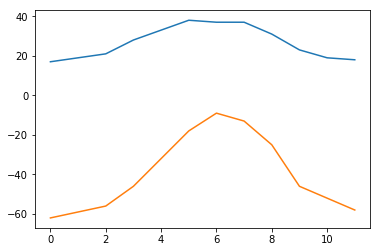

<Figure size 432x288 with 0 Axes>

In [3]:
mx = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
mn = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
months = np.arange(12)
days = np.linspace(0, 12, num=365)
plt.plot(mx)
plt.plot(mn)
plt.show()
def f(t, m, d, offset) :
    return m + d * np.sin((t + offset) * np.pi / 6)
fmx, c1 = optimize.curve_fit(f, months, mx, [10, 30, 0])
fmn, c2 = optimize.curve_fit(f, months, mn, [-40, 20, 0])
plt.figure()
plt.show()

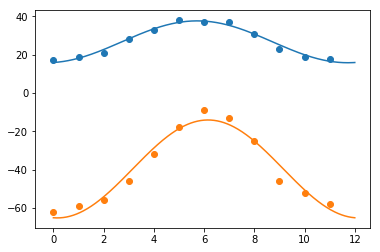

In [4]:
plt.scatter(months, mx)
plt.plot(days, f(days, *fmx))
plt.scatter(months, mn)
plt.plot(days, f(days, *fmn))
plt.show()

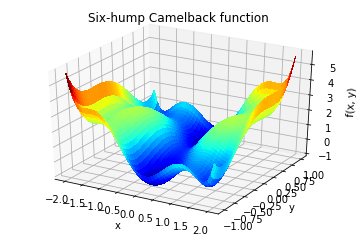

In [13]:
def sixhump(x):
    return ((4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1] + (-4 + 4*x[1]**2) * x[1] **2)
x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
xg, yg = np.meshgrid(x, y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xg, yg, sixhump([xg, yg]), rstride = 1, cstride = 1, cmap = plt.cm.jet, linewidth = 0, antialiased=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Six-hump Camelback function')
plt.show()

In [11]:
mn = optimize.fmin_bfgs(sixhump, (0, 0))

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 4
         Gradient evaluations: 1


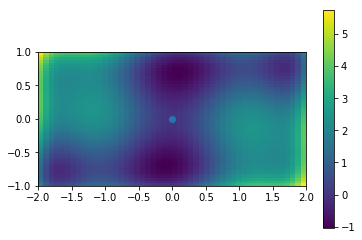

In [14]:
plt.figure()
plt.imshow(sixhump([xg, yg]), extent = [-2, 2, -1, 1])
plt.colorbar()
plt.scatter(mn[0], mn[1])
plt.show()

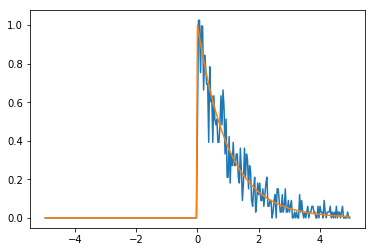

In [15]:
a = np.random.gamma(1,size=1000)
bins = np.linspace(-5, 5, 300)
histogram = np.histogram(a, bins = bins, normed = True)[0]
bins = 0.5*(bins[1:] + bins[:-1])
b = stats.gamma.pdf(bins, 1)
plt.plot(bins, histogram)
plt.plot(bins, b)
plt.show()

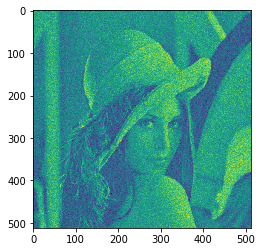

In [16]:
lena = plt.imread('http://members.cbio.mines-paristech.fr/~nvaroquaux/formations/scipy-lecture-notes/_images/lena.png')
noisy_lena = np.copy(lena).astype(np.float)
noisy_lena += lena.std()*0.5*np.random.standard_normal(lena.shape)
blurred_lena = ndimage.gaussian_filter(noisy_lena, sigma = 3)
median_lena = ndimage.median_filter(blurred_lena, size = 5)
wiener_lena = signal.wiener(blurred_lena, (5, 5))
plt.imshow(noisy_lena)
plt.show()

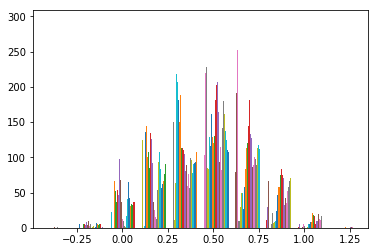

In [17]:
plt.figure()
plt.hist(noisy_lena)
plt.show()

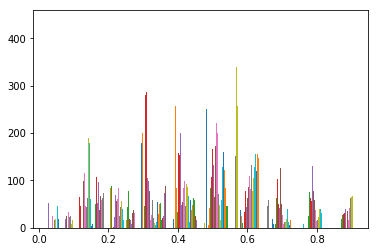

In [18]:
plt.figure()
plt.hist(blurred_lena)
plt.show()

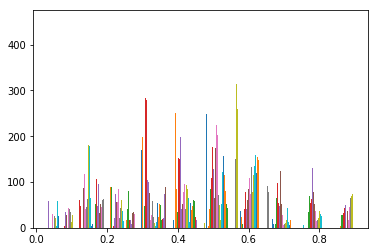

In [19]:
plt.figure()
plt.hist(median_lena)
plt.show()

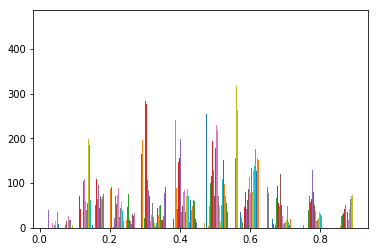

In [20]:
plt.figure()
plt.hist(wiener_lena)
plt.show()

In [21]:
a = np.zeros((10, 10), dtype=np.int)
a[1:5, 2:6] = 1
a[8, 8] = 1
a[8, 7] = 1
a[7, 7] = 1
print(ndimage.binary_opening(a).astype(np.int))
b=ndimage.binary_erosion(a).astype(a.dtype)
b=ndimage.binary_dilation(b).astype(a.dtype)
print(b)

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0]
 [0 0 1 1 1 1 0 0 0 0]
 [0 0 1 1 1 1 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0]
 [0 0 1 1 1 1 0 0 0 0]
 [0 0 1 1 1 1 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [22]:
a = np.zeros((50, 50))
a[10:-10, 10:-10] = 1
a += 0.25*np.random.standard_normal(a.shape)
mask = a >= 0.5
opened_mask = ndimage.binary_opening(mask)
closed_mask = ndimage.binary_closing(opened_mask)
print(np.sum(closed_mask))
print(900 - np.sum(closed_mask) < 900)

887
True
